# Lending Case Study

This is regarding a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:
- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

When a person applies for a loan, there are two types of decisions that could be taken by the company:

- Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:
    - Fully paid: Applicant has fully paid the loan (the principal and the interest rate).
    - Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
    - Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan.
            
- Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

# Goal

This case study involves analyzing loan data to identify key factors that influence loan default. The goal is to provide insights into borrower behavior and improve loan approval processes by understanding the factors that contribute to loan repayment or default.

# Table of Contents
* [Data Understanding](#data-understanding)
* [Data Cleaning and Manipulation](#data-cleaning-and-manipulation)
* [Data Analysis](#data-analysis)
* [Observations](#observations)

## Data Understanding

In [5]:
# Importing all libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Ignore warnings to avoid version problems
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Loading the dataset (loans.csv)
loan_data = pd.read_csv('loan.csv')

In [7]:
# Printing the 1st 5 rows of the dataset
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [8]:
# Printing the last 5 rows of the dataset
loan_data.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observations**: This dataset does not contain any headers or footers that need to be cleaned.

In [10]:
# Number of Rows and Columns:
loan_data.shape

(39717, 111)

In [11]:
# Datatypes of each column
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [12]:
# Missing values
loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [13]:
# Calculate the total number of columns with missing values
num_columns_with_missing_values = loan_data.isnull().any().sum()

print(f"Total number of columns with missing values: {num_columns_with_missing_values}")

Total number of columns with missing values: 68


In [14]:
# Columns in the dataset
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [15]:
# Calculate total number of empty columns
columns_with_all_missing = loan_data.columns[loan_data.isnull().all()].tolist()

print(f"Columns with all missing values: {columns_with_all_missing}\n")
print("Number of empty columns: ", len(columns_with_all_missing))

Columns with all missing values: ['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_

In [16]:
# Empty rows
loan_data.isnull().all(axis=1).sum()

0

In [17]:
# Duplicate rows
loan_data.duplicated().sum()

0

**Observations**:

- There are 39717 rows and 111 columns available in this dataset
- Out of 111 columns, 68 columns have missing values
- Out of 68 columns, 54 columns have all missing values
- There are no empty or duplicate rows in this dataset

## Data Cleaning and Manipulation

In [20]:
# Dropping columns with more than 50% missing values

threshold = 0.5 * len(loan_data) # Threshold is 50% of the total entries
loan_data_cleaned = loan_data.dropna(thresh=threshold, axis=1)

In [21]:
# Number of Rows and Columns after removing columns:
loan_data_cleaned.shape

(39717, 54)

In [22]:
# Remaining columns in the dataset
loan_data_cleaned.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [23]:
# Number of distinct elements
loan_data_cleaned.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
initial_list_status               1
collections_12_mths_ex_med        1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

**Observations**: Several columns contain only a single unique value.

In [25]:
# Removing columns with single unique values, as they will not contribute to our analysis.
col_unique = loan_data_cleaned.nunique()[loan_data_cleaned.nunique().values == 1]
print('Removing below columns: ', col_unique)
loan_data_cleaned.drop(columns=list(col_unique.index), inplace=True)

Removing below columns:  pymnt_plan                    1
initial_list_status           1
collections_12_mths_ex_med    1
policy_code                   1
application_type              1
acc_now_delinq                1
chargeoff_within_12_mths      1
delinq_amnt                   1
tax_liens                     1
dtype: int64


In [26]:
# Remaining no of rows and columns
loan_data_cleaned.shape

(39717, 45)

In [27]:
# Remaining columns
loan_data_cleaned.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

#### Removing irrelevant columns

In [29]:
# Removing the following columns due to all values being unique, which will not contribute to the analysis
loan_data_cleaned.drop(['url', 'member_id', 'id'], axis=1, inplace=True)

In [30]:
# Removing the following columns due to no significance to the analysis
loan_data_cleaned.drop(['funded_amnt_inv', 'desc', 'title', 'emp_title', 'zip_code'], axis=1, inplace=True)

In [31]:
# Removing the following columns as they are used only after approval and will not contribute to the analysis
loan_data_cleaned.drop(['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d'], axis=1, inplace=True)

In [32]:
# Remaining no of rows and columns
loan_data_cleaned.shape

(39717, 17)

In [33]:
# Remaining columns
loan_data_cleaned.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'pub_rec_bankruptcies'],
      dtype='object')

#### Data Imputation

In [35]:
# Columns with null values
loan_data_cleaned.isnull().sum()[loan_data_cleaned.isnull().sum() > 0]

emp_length              1075
pub_rec_bankruptcies     697
dtype: int64

In [36]:
# Calculating mode of the emp_length column
loan_data_cleaned['emp_length'].mode()

0    10+ years
Name: emp_length, dtype: object

In [37]:
# Imputing the emp_length column using the mode value
loan_data_cleaned['emp_length'].fillna(loan_data_cleaned['emp_length'].mode()[0], inplace=True)

In [38]:
# Checking pub_rec_bankruptcies values
loan_data_cleaned['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64

In [39]:
# Imputing the `pub_rec_bankruptcies` column with 0, as the majority of the data has this value
loan_data_cleaned['pub_rec_bankruptcies'].fillna(0, inplace=True)

In [40]:
loan_data_cleaned.isnull().sum()

loan_amnt               0
funded_amnt             0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
pub_rec_bankruptcies    0
dtype: int64

We have completed the removal of irrelevant columns and imputation of null values.

In [42]:
# Checking for Duplicate rows
loan_data_cleaned.duplicated().sum()

0

**Observation**: No duplicate rows in this dataset

#### Fixing Data Types

In [45]:
# Existing data types
loan_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   term                  39717 non-null  object 
 3   int_rate              39717 non-null  object 
 4   installment           39717 non-null  float64
 5   grade                 39717 non-null  object 
 6   sub_grade             39717 non-null  object 
 7   emp_length            39717 non-null  object 
 8   home_ownership        39717 non-null  object 
 9   annual_inc            39717 non-null  float64
 10  verification_status   39717 non-null  object 
 11  issue_d               39717 non-null  object 
 12  loan_status           39717 non-null  object 
 13  purpose               39717 non-null  object 
 14  addr_state            39717 non-null  object 
 15  dti                

In [46]:
# Checking 'term' column
loan_data_cleaned['term'].value_counts()

term
 36 months    29096
 60 months    10621
Name: count, dtype: int64

In [47]:
# The term column is currently classified as 'object'. We need to remove the 'months' string and convert the values to integers
loan_data_cleaned['term'] = loan_data_cleaned['term'].apply(lambda x: x.replace(' months','')).astype(int)

In [48]:
# Checking 'int_rate' column
loan_data_cleaned['int_rate'].value_counts()

int_rate
10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
18.36%      1
16.96%      1
16.15%      1
16.01%      1
17.44%      1
Name: count, Length: 371, dtype: int64

In [49]:
# Removing the '%' symbol from the int_rate column and converting the data type to float
loan_data_cleaned['int_rate'] = loan_data_cleaned['int_rate'].apply(lambda x: float(x.split('%')[0]))

To enhance memory usage and performance, we will categorize the following columns:

In [51]:
# Converting data type from object to category
loan_data_cleaned['grade'] = loan_data_cleaned['grade'].astype('category')
loan_data_cleaned['sub_grade'] = loan_data_cleaned['sub_grade'].astype('category')
loan_data_cleaned['emp_length'] = loan_data_cleaned['emp_length'].astype('category')
loan_data_cleaned['home_ownership'] = loan_data_cleaned['home_ownership'].astype('category')
loan_data_cleaned['verification_status'] = loan_data_cleaned['verification_status'].astype('category')
loan_data_cleaned['purpose'] = loan_data_cleaned['purpose'].astype('category')
loan_data_cleaned['addr_state'] = loan_data_cleaned['addr_state'].astype('category')

#### Deriving New Columns

In [53]:
# Splitting the 'issue_d' column into two new columns: 'issue_m' (Issued Month) and 'issue_y' (Issued Year)
loan_data_cleaned['issue_m'] = pd.to_datetime(loan_data_cleaned['issue_d'], format='%b-%y').dt.month
loan_data_cleaned['issue_y'] = pd.to_datetime(loan_data_cleaned['issue_d'], format='%b-%y').dt.year

In [54]:
# Current columns with data types
loan_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   loan_amnt             39717 non-null  int64   
 1   funded_amnt           39717 non-null  int64   
 2   term                  39717 non-null  int64   
 3   int_rate              39717 non-null  float64 
 4   installment           39717 non-null  float64 
 5   grade                 39717 non-null  category
 6   sub_grade             39717 non-null  category
 7   emp_length            39717 non-null  category
 8   home_ownership        39717 non-null  category
 9   annual_inc            39717 non-null  float64 
 10  verification_status   39717 non-null  category
 11  issue_d               39717 non-null  object  
 12  loan_status           39717 non-null  object  
 13  purpose               39717 non-null  category
 14  addr_state            39717 non-null  category
 15  dt

#### Removing irrelevant rows

In [56]:
loan_data_cleaned['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

Loan status 'Current' indicates that the applicant is still in the process of paying installments, meaning the loan tenure is not yet complete. Since these candidates are not labeled as 'defaulted', we will exclude this data from the analysis.

In [58]:
# Removing rows with the status as 'Current'
loan_data_cleaned = loan_data_cleaned[~(loan_data_cleaned['loan_status'] == 'Current')]

In [59]:
loan_data_cleaned.shape

(38577, 19)

#### Removing outliers

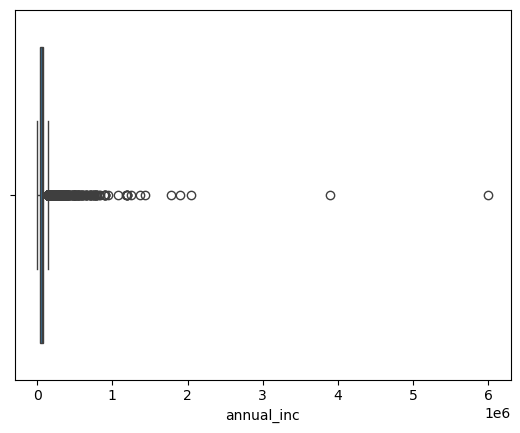

In [61]:
# Analysing outliers for 'annual_inc' column using box plot
sns.boxplot(data=loan_data_cleaned, x='annual_inc')
plt.show()

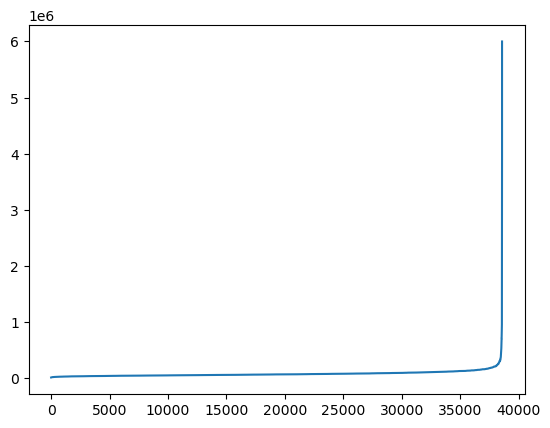

In [62]:
# Analysing outliers for 'annual_inc' column using line chart
sorted_annual_inc = loan_data_cleaned['annual_inc'].sort_values().reset_index(drop=True)
plt.plot(sorted_annual_inc)
plt.show()

In [63]:
np.percentile(loan_data_cleaned['annual_inc'], 99)

234143.99999999878

In [64]:
# Removing rows with annual_inc greater than 99th percentile
loan_data_cleaned = loan_data_cleaned[loan_data_cleaned.annual_inc <= np.percentile(loan_data_cleaned.annual_inc,99)]

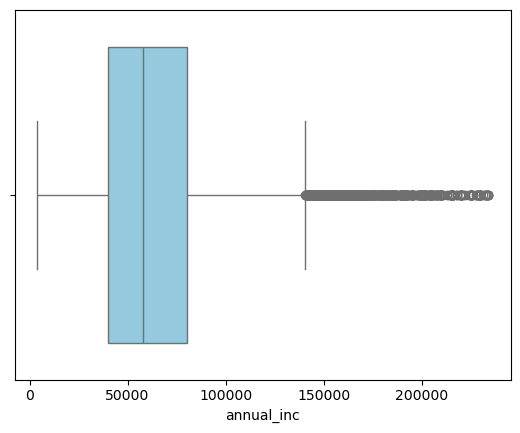

In [65]:
# After removal of outliers analysing 'annual_inc' column using box plot
sns.boxplot(data=loan_data_cleaned, x='annual_inc', color='skyblue')
plt.show()

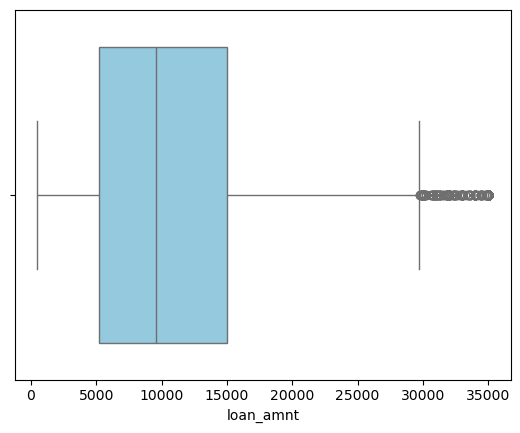

In [66]:
# Analysing outliers for 'loan_amnt' column using box plot
sns.boxplot(data=loan_data_cleaned, x='loan_amnt', color='skyblue')
plt.show()

In [67]:
loan_data_cleaned['loan_amnt'].describe()

count    38191.000000
mean     10962.265979
std       7266.157660
min        500.000000
25%       5200.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [68]:
def calculate_upper_fence(column):
    # Calculate Q1 (25th percentile)
    Q1 = loan_data_cleaned[column].quantile(0.25)
    # Calculate Q3 (75th percentile)
    Q3 = loan_data_cleaned[column].quantile(0.75)
    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1
    # Calculate the Lower and Upper Fence
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR
    # Output the values
    print(f"Q1 (25th percentile): {Q1}")
    print(f"Q3 (75th percentile): {Q3}")
    print(f"IQR: {IQR}")
    print(f"Lower Fence: {lower_fence}")
    print(f"Upper Fence: {upper_fence}")

In [69]:
calculate_upper_fence('loan_amnt')

Q1 (25th percentile): 5200.0
Q3 (75th percentile): 15000.0
IQR: 9800.0
Lower Fence: -9500.0
Upper Fence: 29700.0


**Note:** Maximum loan amount is 35000 which is not that higher than the Upper Fence so no need to remove the outliers as this will not impact our analysis

**Final dataset for Univariate, Segmented Univariate and Bivariate analysis**

In [72]:
loan_data_cleaned.shape

(38191, 19)

In [73]:
loan_data_cleaned.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'pub_rec_bankruptcies', 'issue_m', 'issue_y'],
      dtype='object')

## Data Analysis

Based on our data analysis plan, we will be conducting the following steps:
1. Univariate Analysis
2. Segment Analysis
3. Bivariate Analysis

### Univariate Analysis

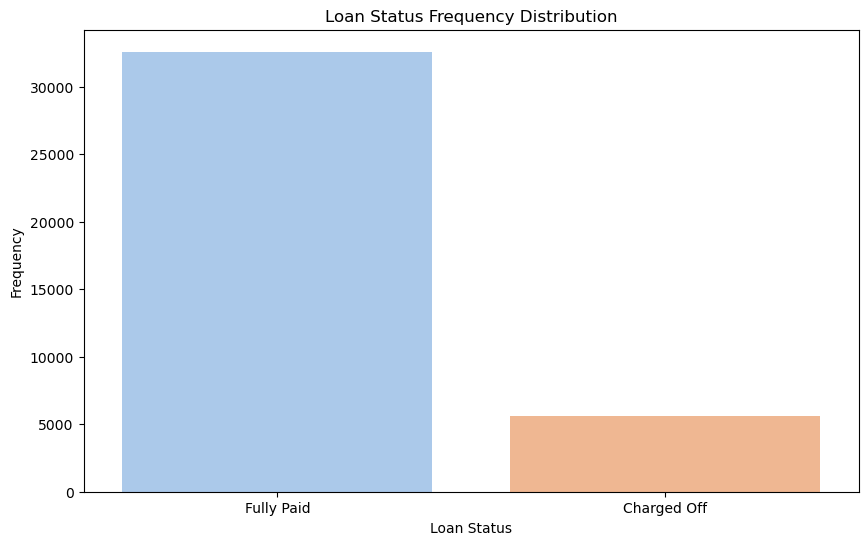

In [77]:
# Univariate analysis of 'loan_status'
plt.figure(figsize=(10,6))
sns.countplot(data=loan_data_cleaned, x='loan_status', palette='pastel')
plt.title('Loan Status Frequency Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Frequency')
plt.show()

**Observations** Loans that defaulted are fewer in number compared to those that were fully paid.

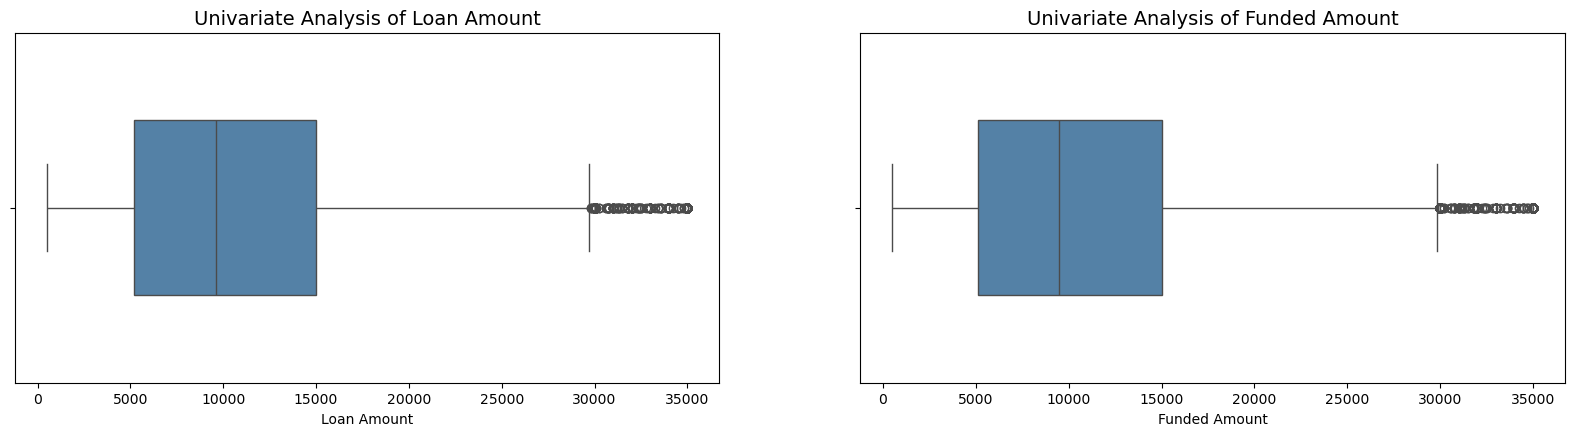

In [79]:
# Univariate analysis of 'loan_amnt' and 'funded_amnt' using box plot
plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
ax = sns.boxplot(data=loan_data_cleaned, x='loan_amnt', color='steelblue', width=0.5)
ax.set_xlabel('Loan Amount')
ax.set_title('Univariate Analysis of Loan Amount', fontsize= 14)

plt.subplot(2, 2, 2)
ax = sns.boxplot(data=loan_data_cleaned, x='funded_amnt', color='steelblue', width=0.5)
ax.set_title('Univariate Analysis of Funded Amount', fontsize= 14)
ax.set_xlabel('Funded Amount')

plt.show()

**Observations**: The distribution appears similar for both Loan Amount and Funded Amount, with most amounts falling between 5,000 and 15,000.

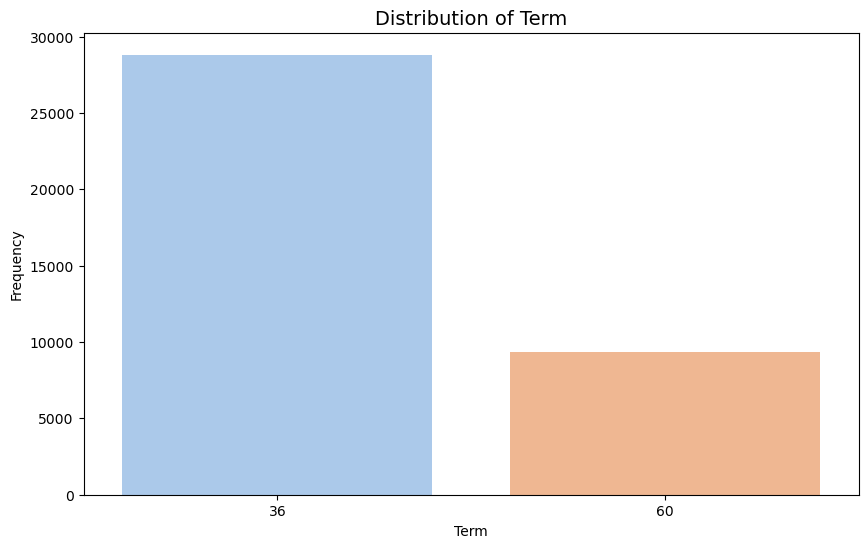

In [81]:
# Univariate analysis of 'term'
plt.figure(figsize=(10,6))
sns.countplot(data=loan_data_cleaned, x='term', palette='pastel')
plt.xlabel('Term')
plt.ylabel('Frequency')
plt.title('Distribution of Term',fontsize=14)
plt.show()

**Observations**: More loans were taken for 36 months compared to 60 months.

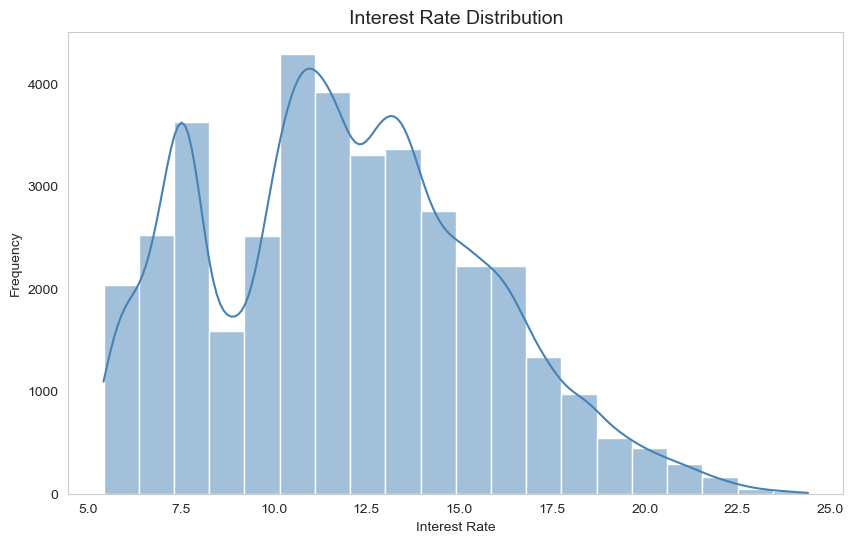

In [83]:
# Univariate analysis of 'int_rate'
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(10,6))
sns.histplot(data=loan_data_cleaned, x='int_rate', kde=True, bins=20, color='steelblue')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.title('Interest Rate Distribution', fontsize=14)
plt.show()

**Observations**: The interest rates are most concentrated around 8%, with another peak between 10% and 15%.

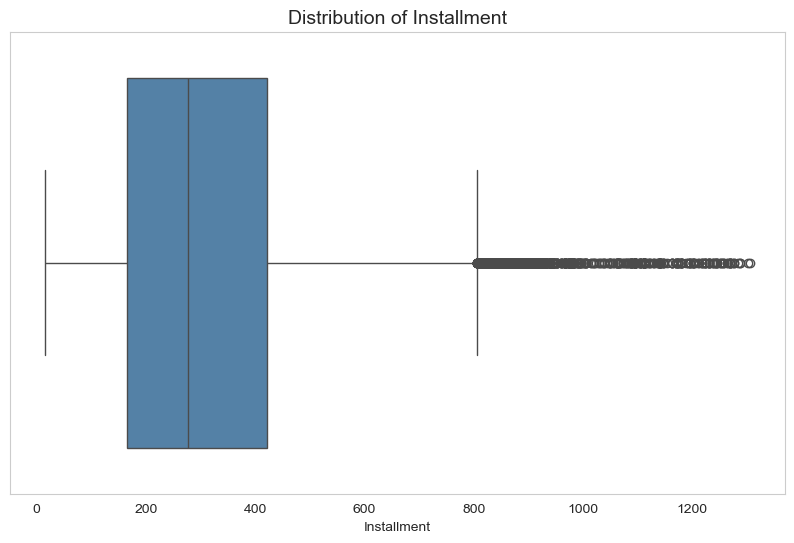

In [85]:
# Univariate analysis of 'installment'
plt.figure(figsize=(10,6))
sns.boxplot(data=loan_data_cleaned, x='installment', color='steelblue')
plt.title('Distribution of Installment', fontsize=14)
plt.xlabel('Installment')
plt.show()

**Observations** Most installment amounts are falling between 150 and 400.

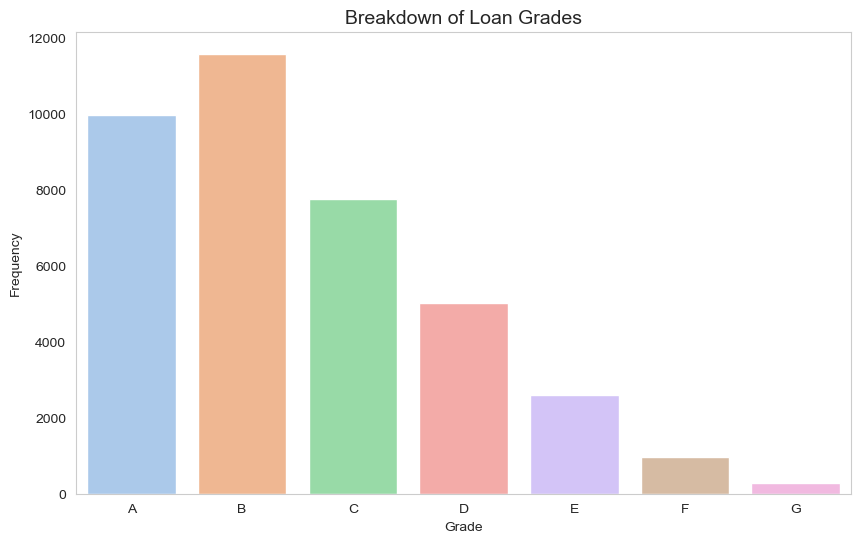

In [87]:
# Univariate analysis of 'grade'
plt.figure(figsize=(10,6))
sns.countplot(data=loan_data_cleaned, x='grade', palette='pastel')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.title('Breakdown of Loan Grades', fontsize=14)
plt.show()

**Observations**: A significant portion of loans are graded 'A' and 'B', indicating that most loans are of high quality compared to the others.

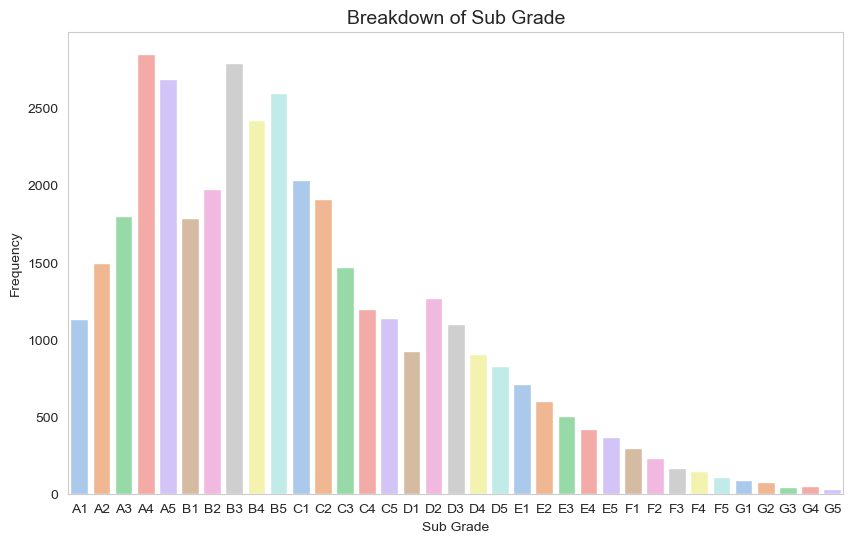

In [89]:
# Univariate analysis of 'sub-grade'
plt.figure(figsize=(10,6))
sns.countplot(data=loan_data_cleaned, x='sub_grade', palette='pastel')
plt.xlabel('Sub Grade')
plt.ylabel('Frequency')
plt.title('Breakdown of Sub Grade', fontsize=14)
plt.show()

**Observations**: Similar to grade, a significant portion of loans are with lower sub-grade in 'A' and 'B'.

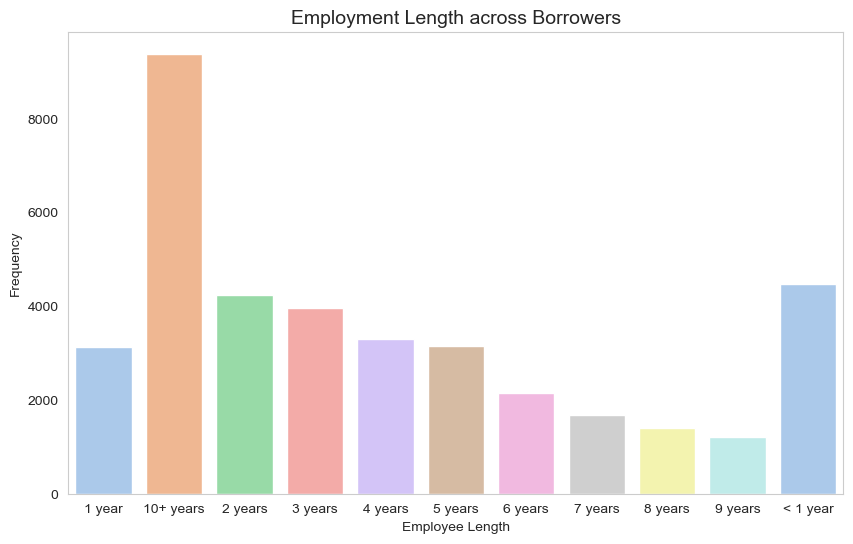

In [91]:
# Univariate analysis of 'emp_length'
plt.figure(figsize=(10,6))
sns.countplot(data=loan_data_cleaned, x='emp_length', palette='pastel')
plt.xlabel('Employee Length')
plt.ylabel('Frequency')
plt.title('Employment Length across Borrowers', fontsize=14)
plt.show()

**Observations**: The majority of borrowers have more than 10 years of work experience.

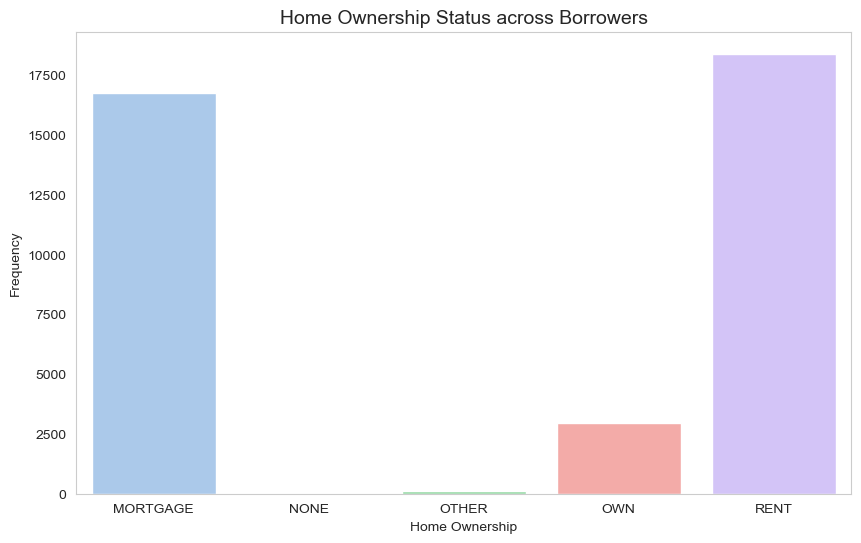

In [93]:
# Univariate analysis of 'home_ownership'
plt.figure(figsize=(10,6))
sns.countplot(data=loan_data_cleaned, x='home_ownership', palette='pastel')
plt.xlabel('Home Ownership')
plt.ylabel('Frequency')
plt.title('Home Ownership Status across Borrowers', fontsize=14)
plt.show()

**Observations**: The majority of borrowers are living in rented or mortgaged homes.

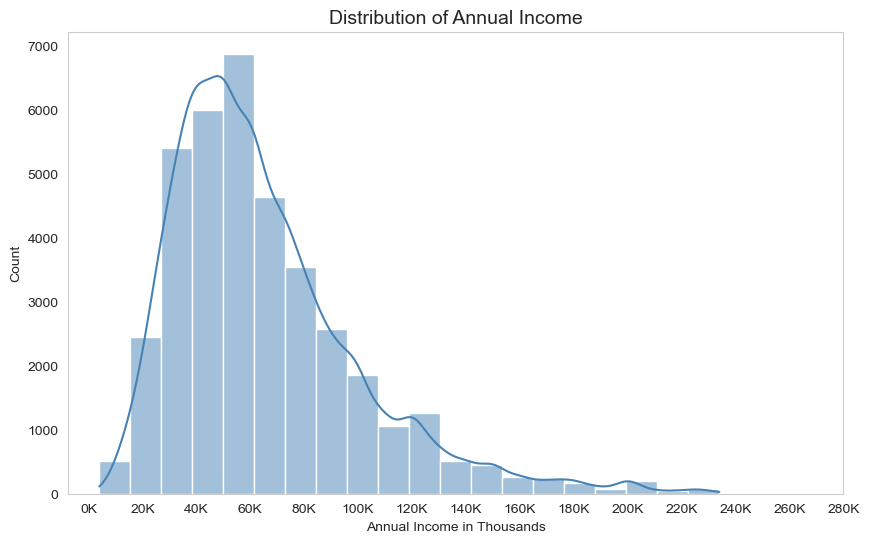

In [95]:
# Univariate analysis of 'annual_inc'
plt.figure(figsize=(10,6))
sns.histplot(data=loan_data_cleaned, x='annual_inc', color= 'steelblue', kde=True, bins=20)
plt.title('Distribution of Annual Income', fontsize=14)
ticks = np.arange(0, 300000, 20000)
labels = ['{}K'.format(i//1000) for i in ticks]
plt.xticks(ticks, labels)
plt.xlabel('Annual Income in Thousands')
plt.show()

**Observations**: The distribution of Annual Income is left-skewed, indicating that the majority of borrowers have relatively low annual incomes compared to the rest.

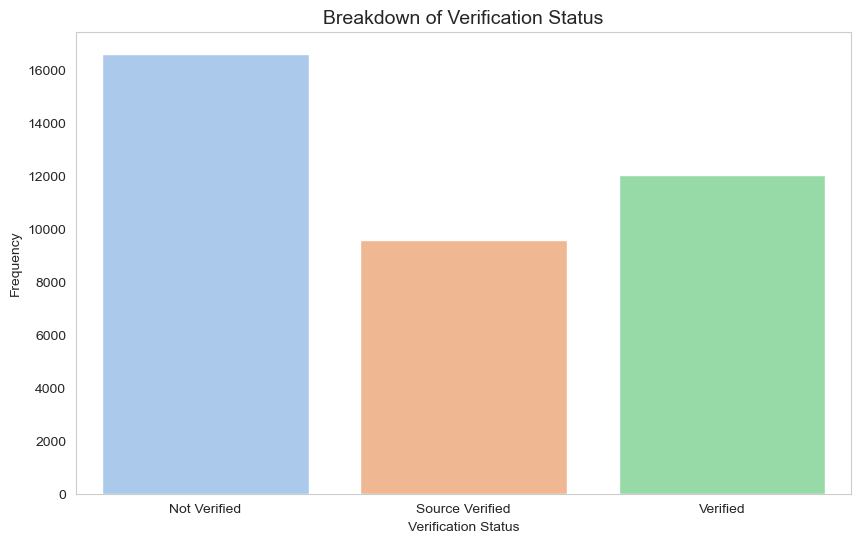

In [97]:
# Univariate analysis of 'verification_status'
plt.figure(figsize=(10,6))
sns.countplot(data=loan_data_cleaned, x='verification_status', palette='pastel')
plt.xlabel('Verification Status')
plt.ylabel('Frequency')
plt.title('Breakdown of Verification Status', fontsize=14)
plt.show()

In [98]:
loan_data_cleaned['verification_status'].value_counts()

verification_status
Not Verified       16604
Verified           12031
Source Verified     9556
Name: count, dtype: int64

**Observations**: More than 50% of borrowers are either verified by the lending company or have source verification.

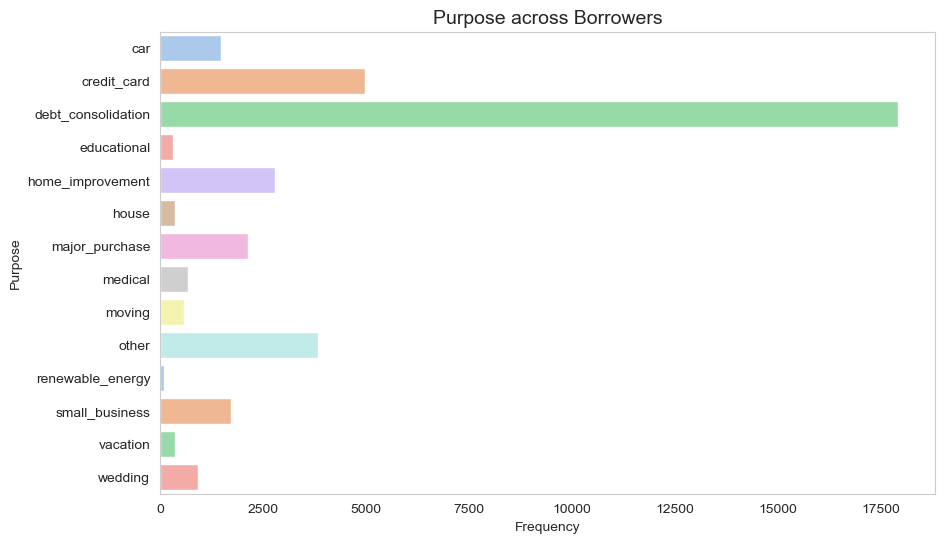

In [100]:
# Univariate analysis of 'purpose'
plt.figure(figsize=(10,6))
sns.countplot(data=loan_data_cleaned, y='purpose', palette='pastel')
plt.xlabel('Frequency')
plt.ylabel('Purpose')
plt.title('Purpose across Borrowers', fontsize=14)
plt.show()

**Observations**: A significant percentage of loans are taken for debt consolidation, followed by credit card purposes.

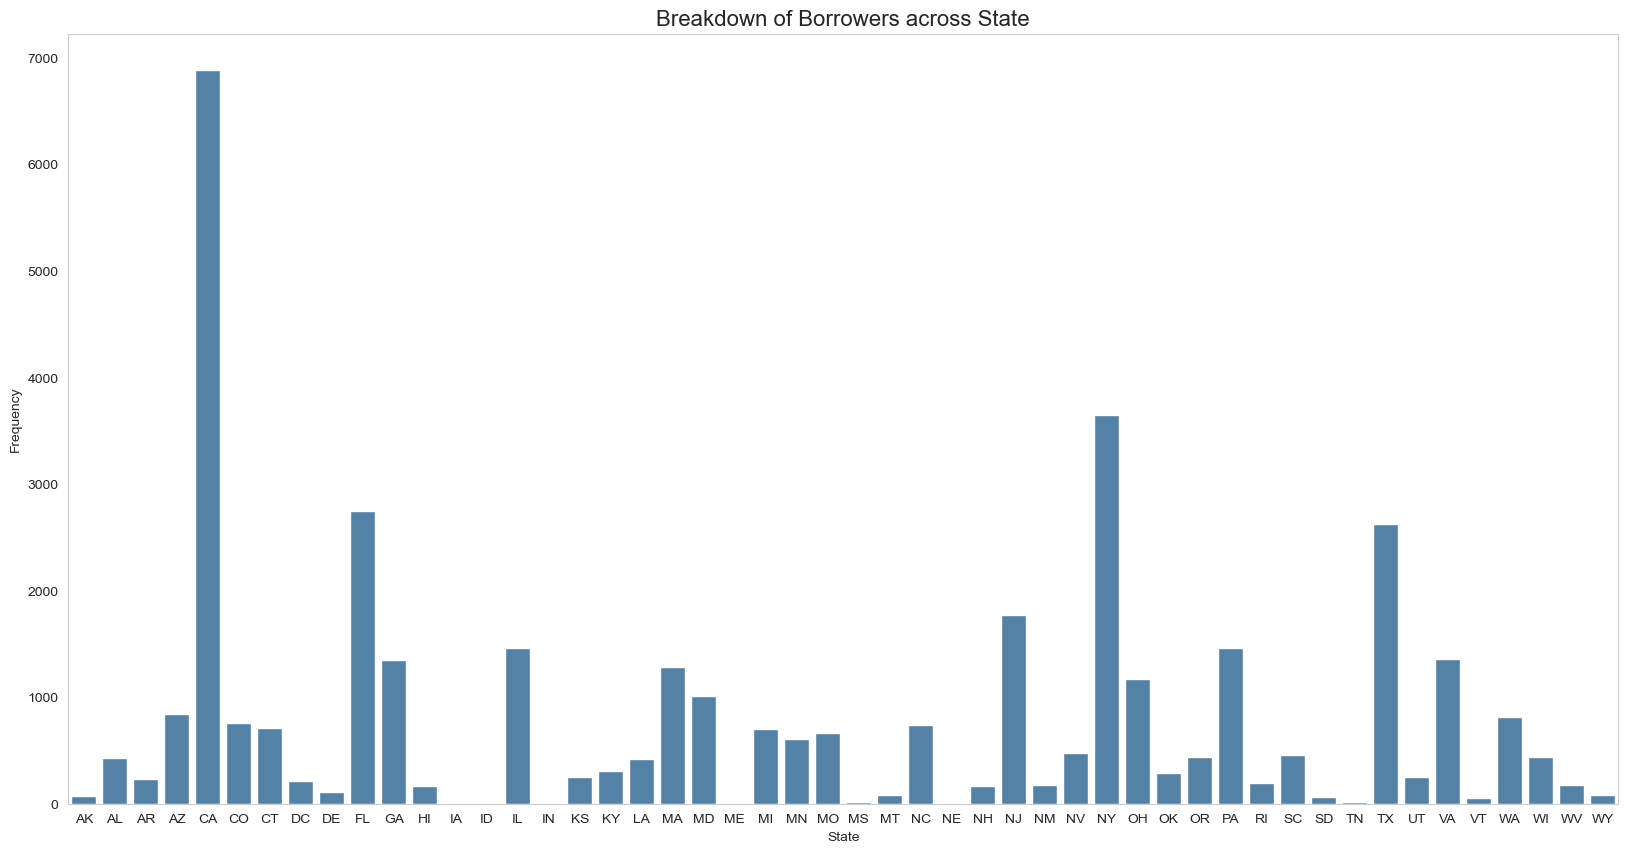

In [102]:
# Univariate analysis of 'addr_state'
plt.figure(figsize=(20,10))
sns.countplot(data=loan_data_cleaned, x='addr_state', color='steelblue')
plt.xlabel('State')
plt.ylabel('Frequency')
plt.title('Breakdown of Borrowers across State', fontsize=16)
plt.show()

**Observations**: Most borrowers come from major urban areas such as California, New York, Florida, and Texas.

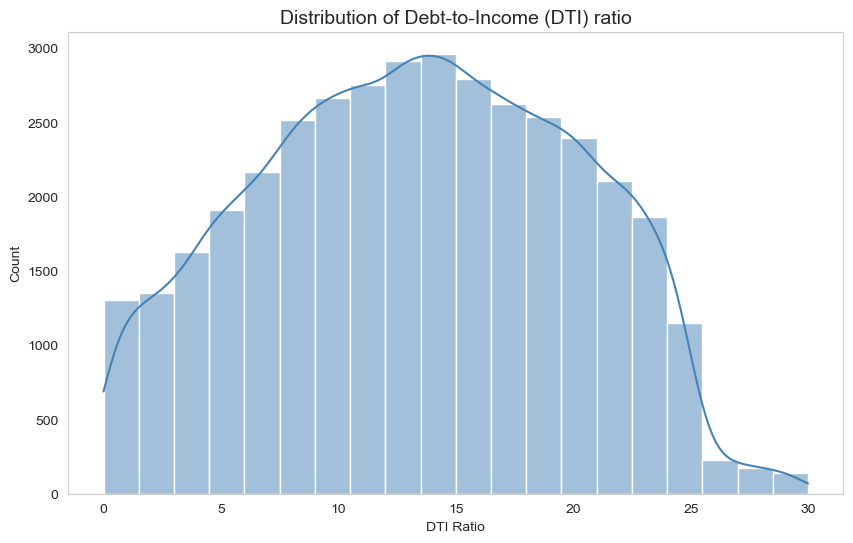

In [104]:
# Univariate analysis of 'dti'
plt.figure(figsize=(10,6))
sns.histplot(data=loan_data_cleaned, x='dti', color='steelblue', kde=True, bins=20)
plt.xlabel('DTI Ratio')
plt.title('Distribution of Debt-to-Income (DTI) ratio', fontsize=14)
plt.show()

**Observations**: Most borrowers have significantly high debt relative to their income, with the majority concentrated in the 10-20 DTI ratio range.

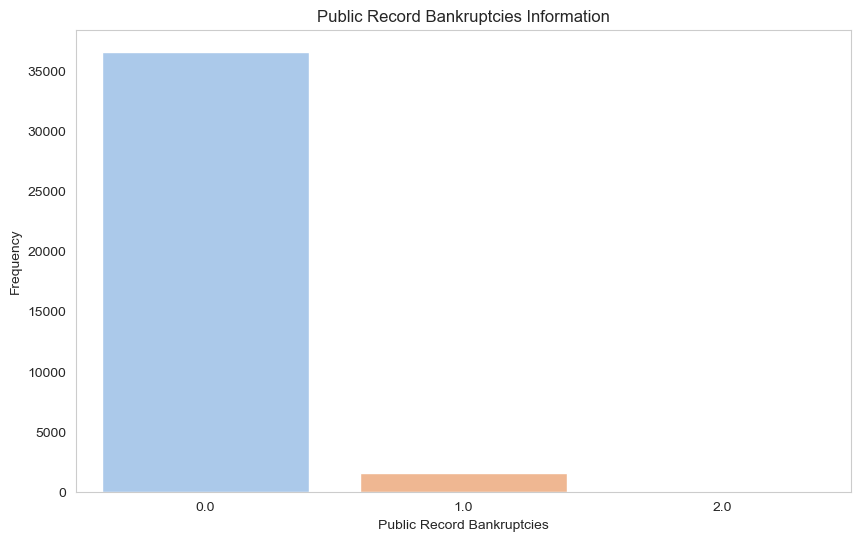

In [106]:
# Univariate analysis of 'pub_rec_bankruptcies'
plt.figure(figsize=(10,6))
sns.countplot(data=loan_data_cleaned, x='pub_rec_bankruptcies', palette='pastel')
plt.xlabel('Public Record Bankruptcies')
plt.ylabel('Frequency')
plt.title('Public Record Bankruptcies Information')
plt.show()

**Observations**: Majority of the borrowers have no record of Public Recorded Bankruptcy.

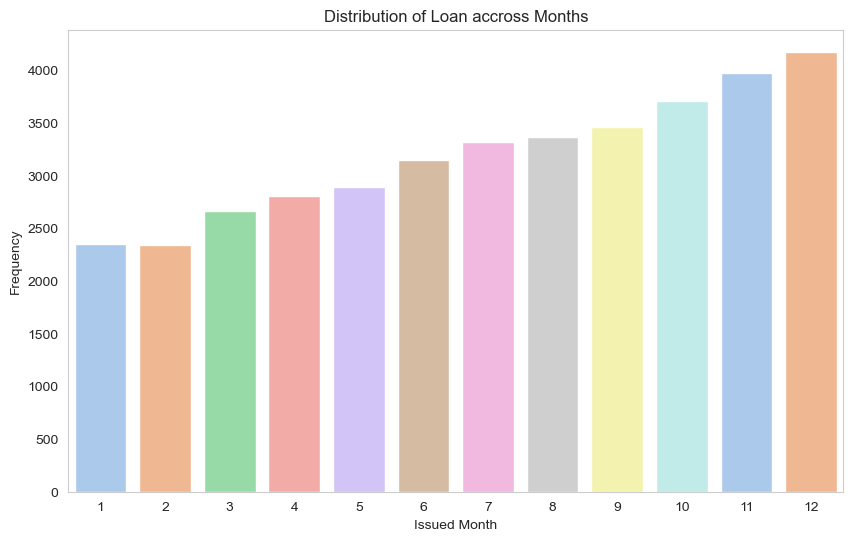

In [108]:
# Univariate analysis of 'issue_m'
plt.figure(figsize=(10,6))
sns.countplot(data=loan_data_cleaned, x='issue_m', palette='pastel')
plt.xlabel('Issued Month')
plt.ylabel('Frequency')
plt.title('Distribution of Loan accross Months')
plt.show()

**Observations**: Majority of the loans are given in last 6 months of the year.

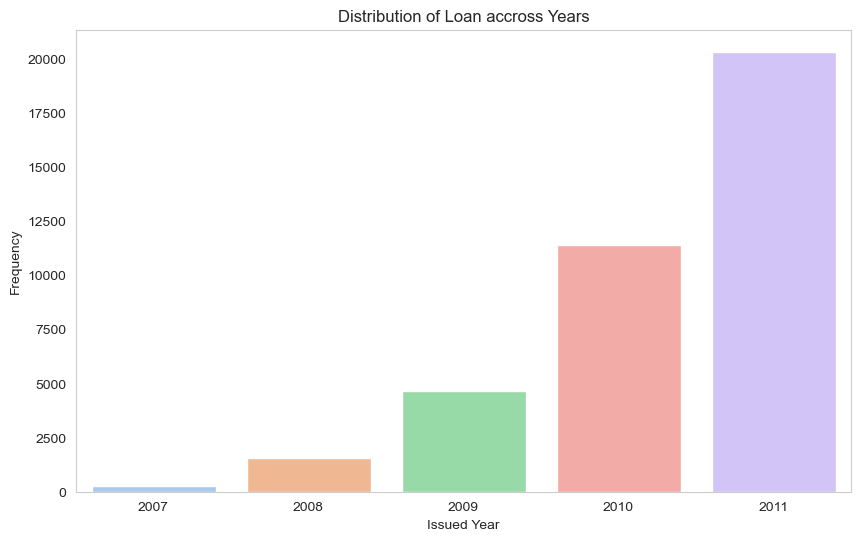

In [110]:
# Univariate analysis of 'issue_y'
plt.figure(figsize=(10,6))
sns.countplot(data=loan_data_cleaned, x='issue_y', palette='pastel')
plt.xlabel('Issued Year')
plt.ylabel('Frequency')
plt.title('Distribution of Loan accross Years')
plt.show()

**Observations**: The number of loans approved has been increasing at an exponential rate over time, indicating that the loan approval rate is rising steadily.

### Segmented Univariate Analysis

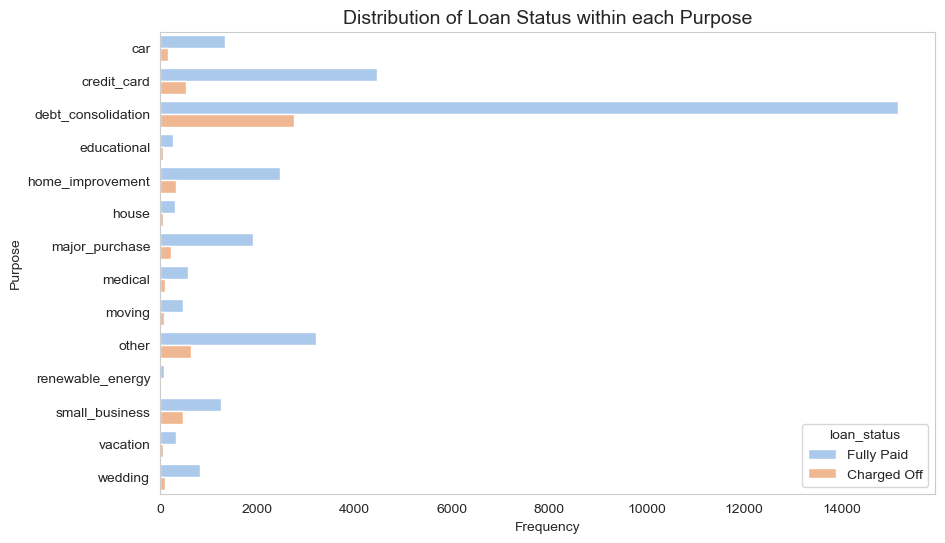

In [113]:
# Analyzing the distribution of Loan Status within each Purpose
plt.figure(figsize=(10,6))
sns.countplot(data=loan_data_cleaned, y='purpose', hue='loan_status', palette='pastel')
plt.xlabel('Frequency')
plt.ylabel('Purpose')
plt.title('Distribution of Loan Status within each Purpose', fontsize=14)
plt.show()

In [114]:
# Compute Cross Tabulation
purpose_status_summary = pd.crosstab(loan_data_cleaned['purpose'], loan_data_cleaned['loan_status'], normalize='index') * 100
print(purpose_status_summary)

loan_status         Charged Off  Fully Paid
purpose                                    
car                   10.731053   89.268947
credit_card           10.767997   89.232003
debt_consolidation    15.359714   84.640286
educational           17.027864   82.972136
home_improvement      12.084376   87.915624
house                 16.246499   83.753501
major_purchase        10.333490   89.666510
medical               15.727003   84.272997
moving                15.964912   84.035088
other                 16.418690   83.581310
renewable_energy      19.000000   81.000000
small_business        27.394080   72.605920
vacation              14.133333   85.866667
wedding               10.250818   89.749182


**Observations**: Loan purpose like small business has higher default rates compared to other purposes, indicating that loans for this purpose is more likely to end in default.

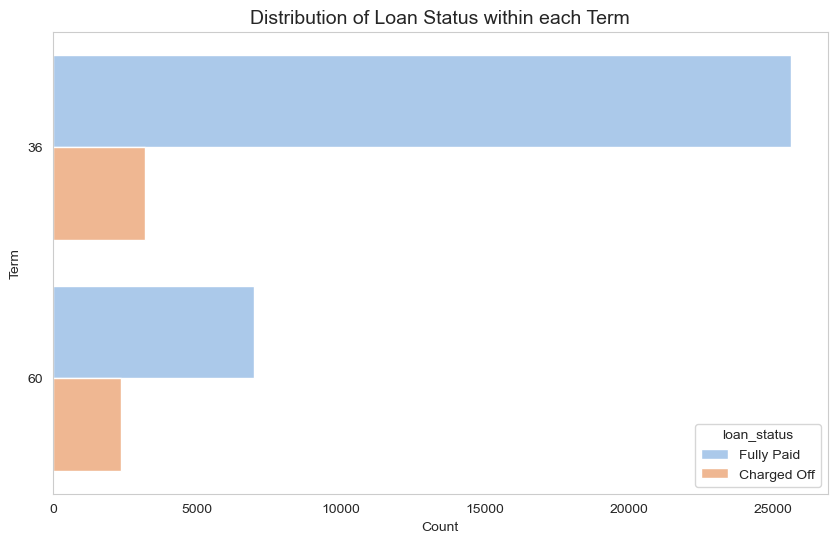

In [116]:
# Analyzing the distribution of Loan Status within each Term.
plt.figure(figsize=(10,6))
sns.countplot(data=loan_data_cleaned, y='term', hue='loan_status', palette='pastel')
plt.xlabel('Count')
plt.ylabel('Term')
plt.title('Distribution of Loan Status within each Term',fontsize=14)
plt.show()

In [117]:
# Compute Cross Tabulation
term_status_summary = pd.crosstab(loan_data_cleaned['term'], loan_data_cleaned['loan_status'], normalize='index') * 100
print(term_status_summary)

loan_status  Charged Off  Fully Paid
term                                
36             11.107256   88.892744
60             25.426803   74.573197


**Observations**: 25% of borrowers default on loans with a term of 60 months, compared to only 11% for loans with a term of 36 months. This indicates that a longer loan term is associated with a higher likelihood of default.

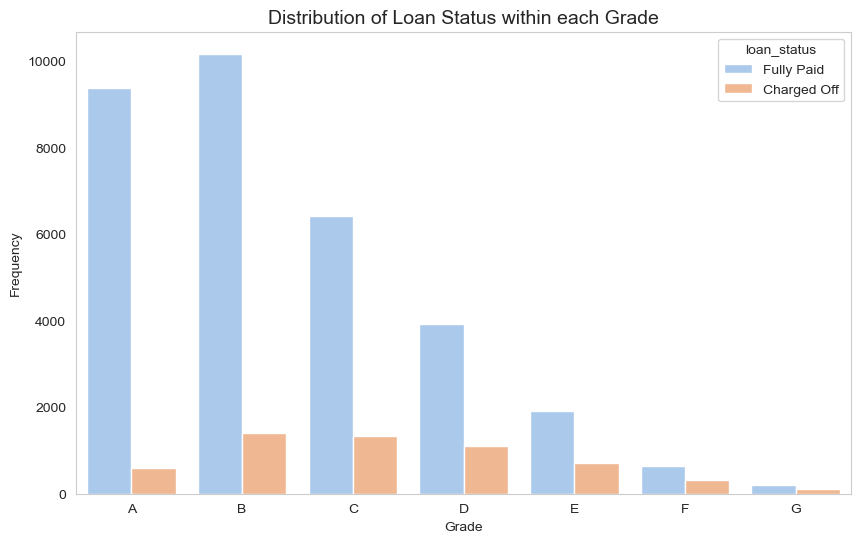

In [119]:
# Analyzing the distribution of Loan Status within each Grade
plt.figure(figsize=(10,6))
sns.countplot(data=loan_data_cleaned, x='grade', hue='loan_status', palette='pastel')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Status within each Grade', fontsize=14)
plt.show()

In [120]:
# Compute Cross Tabulation
grade_status_summary = pd.crosstab(loan_data_cleaned['grade'], loan_data_cleaned['loan_status'], normalize='index') * 100
print(grade_status_summary)

loan_status  Charged Off  Fully Paid
grade                               
A               6.023855   93.976145
B              12.209654   87.790346
C              17.309429   82.690571
D              22.120549   77.879451
E              26.973180   73.026820
F              32.704403   67.295597
G              34.256055   65.743945


**Observations**: As the grade decreases from A to G, the likelihood of a loan being charged off increases, while the likelihood of it being fully paid decreases.

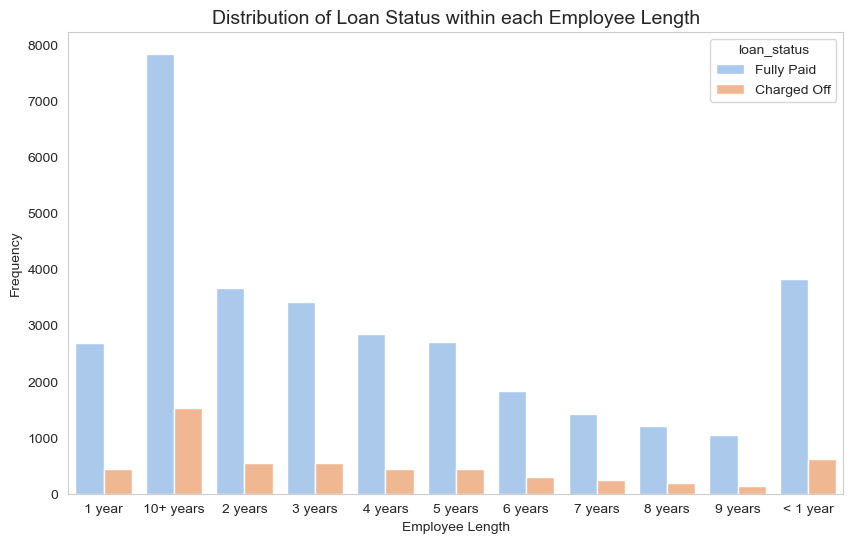

In [122]:
# Analyzing the distribution of Loan Status within each Employee Length
plt.figure(figsize=(10,6))
sns.countplot(data=loan_data_cleaned, x='emp_length', hue='loan_status', palette='pastel')
plt.xlabel('Employee Length')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Status within each Employee Length', fontsize=14)
plt.show()

In [123]:
# Compute Cross Tabulation
emp_length_status_summary = pd.crosstab(loan_data_cleaned['emp_length'], loan_data_cleaned['loan_status'], normalize='index') * 100
print(emp_length_status_summary)

loan_status  Charged Off  Fully Paid
emp_length                          
1 year         14.476615   85.523385
10+ years      16.446387   83.553613
2 years        13.215548   86.784452
3 years        13.854664   86.145336
4 years        13.755656   86.244344
5 years        14.393939   85.606061
6 years        14.179451   85.820549
7 years        15.439010   84.560990
8 years        14.305849   85.694151
9 years        12.921811   87.078189
< 1 year       14.177272   85.822728


**Observations**: Employment length appears to have a relatively minor impact on loan repayment status, with most borrowers having a high rate of fully paid loans regardless of how long they have been employed.

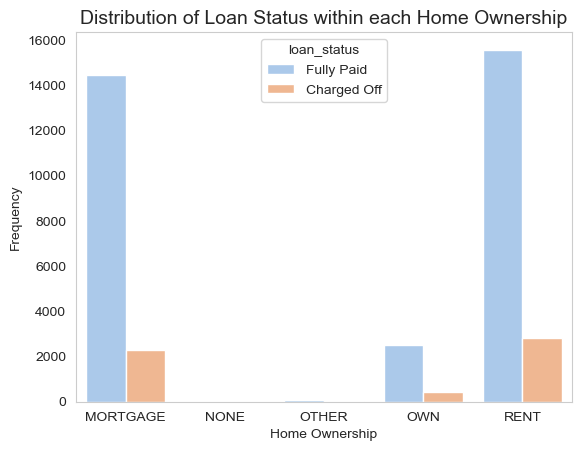

In [125]:
# Analyzing the distribution of Loan Status within each Home Ownership
sns.countplot(data=loan_data_cleaned, x='home_ownership', hue='loan_status', palette='pastel')
plt.xlabel('Home Ownership')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Status within each Home Ownership', fontsize=14)
plt.show()

In [126]:
# Compute Cross Tabulation
home_ownership_status_summary = pd.crosstab(loan_data_cleaned['home_ownership'], loan_data_cleaned['loan_status'], normalize='index') * 100
print(home_ownership_status_summary)

loan_status     Charged Off  Fully Paid
home_ownership                         
MORTGAGE          13.744925   86.255075
NONE               0.000000  100.000000
OTHER             18.750000   81.250000
OWN               14.930438   85.069562
RENT              15.350329   84.649671


**Observations**: No significant difference.

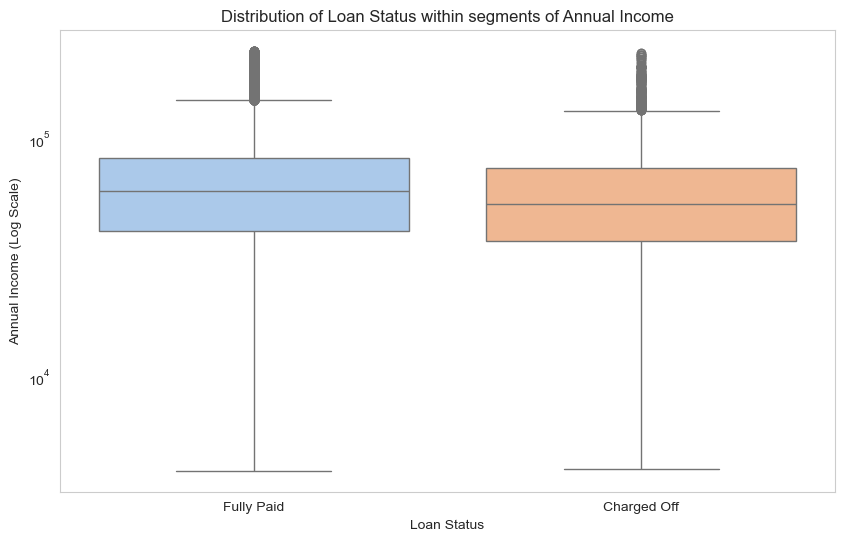

In [128]:
# Analyzing the distribution of Loan Status within segments of Annual Income
plt.figure(figsize=(10, 6))
sns.boxplot(data=loan_data_cleaned, x='loan_status', y='annual_inc', palette='pastel')
plt.yscale('log')  # Use a log scale to handle the wide range of income values
plt.xlabel('Loan Status')
plt.ylabel('Annual Income (Log Scale)')
plt.title('Distribution of Loan Status within segments of Annual Income')
plt.show()

**Observations**: No significant difference.

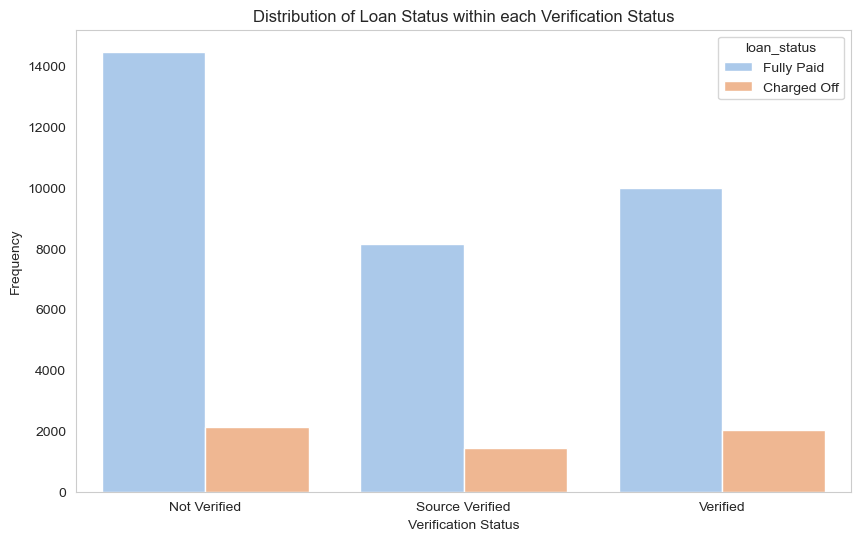

In [130]:
# Analyzing the distribution of Loan Status within each Verification Status
plt.figure(figsize=(10,6))
sns.countplot(data=loan_data_cleaned, x='verification_status', hue='loan_status', palette='pastel')
plt.title('Distribution of Loan Status within each Verification Status')
plt.xlabel('Verification Status')
plt.ylabel('Frequency')
plt.show()

**Observations**: No significant difference.

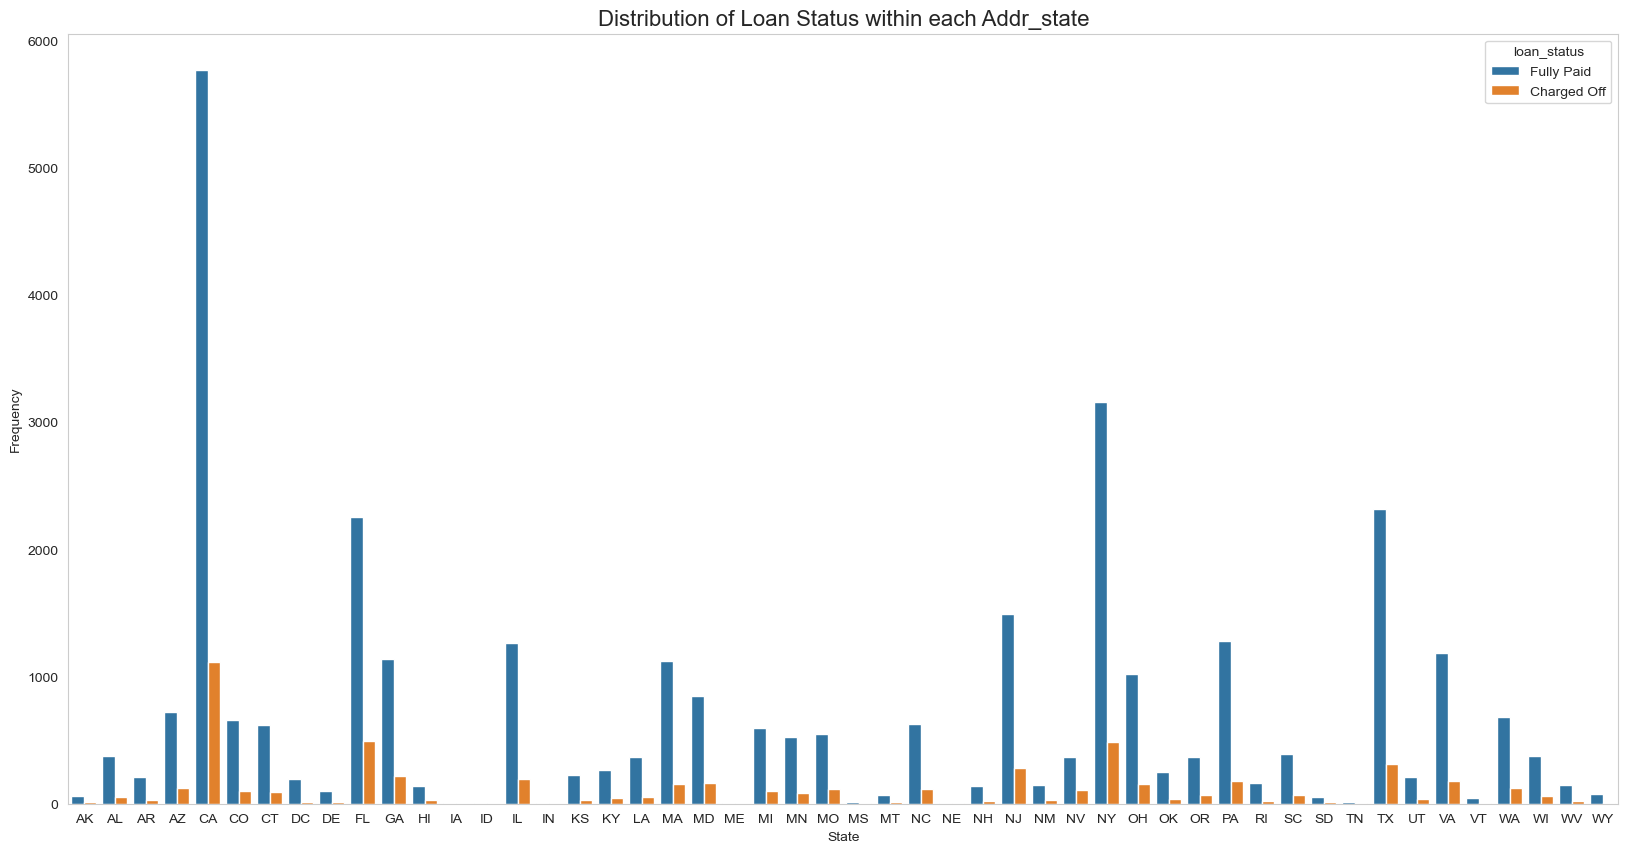

In [132]:
# Analyzing the distribution of Loan Status within each Addr_state
plt.figure(figsize=(20,10))
sns.countplot(data=loan_data_cleaned, x='addr_state', hue='loan_status')
plt.xlabel('State')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Status within each Addr_state', fontsize=16)
plt.show()

**Observations**: States like California, New York, Florida, and Texas have a high number of charged-offs, but they also have a higher total number of loans.

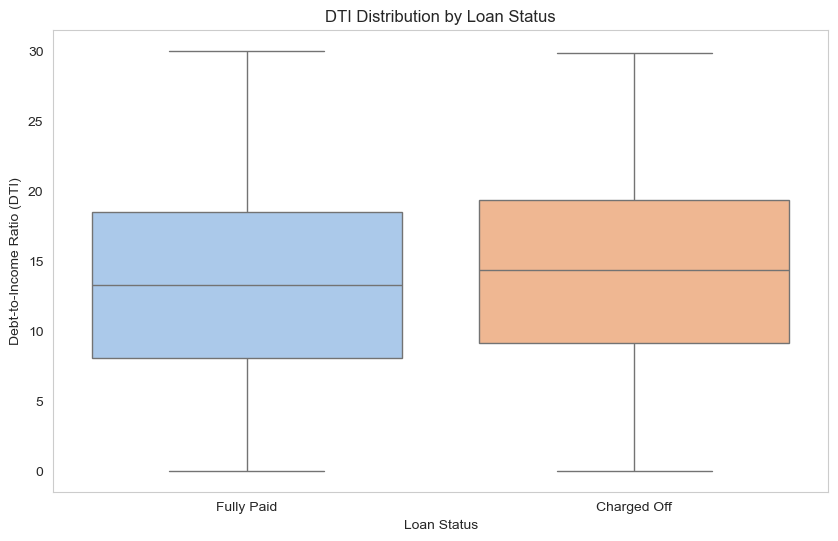

In [134]:
# Analyzing the distribution of Loan Status within segments of Dti
plt.figure(figsize=(10, 6))
sns.boxplot(data=loan_data_cleaned, x='loan_status', y='dti', palette='pastel')
plt.xlabel('Loan Status')
plt.ylabel('Debt-to-Income Ratio (DTI)')
plt.title('DTI Distribution by Loan Status')
plt.show()

**Observations**: DTI is marginally higher for Charged Off loans.

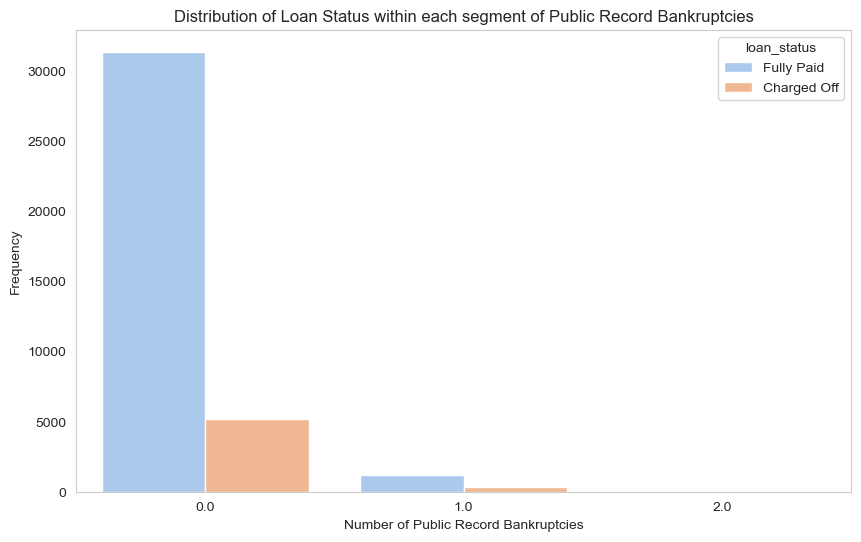

In [136]:
# Analyzing the distribution of Loan Status within each segment of Public Record Bankruptcies
plt.figure(figsize=(10, 6))
sns.countplot(data=loan_data_cleaned, x='pub_rec_bankruptcies', hue='loan_status', palette='pastel')
plt.xlabel('Number of Public Record Bankruptcies')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Status within each segment of Public Record Bankruptcies')
plt.show()

In [137]:
# Compute Cross Tabulation
bankruptcies_status_summary = loan_data_cleaned.groupby('pub_rec_bankruptcies')['loan_status'].value_counts(normalize=True).unstack().fillna(0) * 100
print(bankruptcies_status_summary)

loan_status           Charged Off  Fully Paid
pub_rec_bankruptcies                         
0.0                     14.272426   85.727574
1.0                     22.351500   77.648500
2.0                     40.000000   60.000000


**Observations**: Borrowers with a public record of bankruptcies have a higher likelihood of defaulting.

### Bivariate Analysis

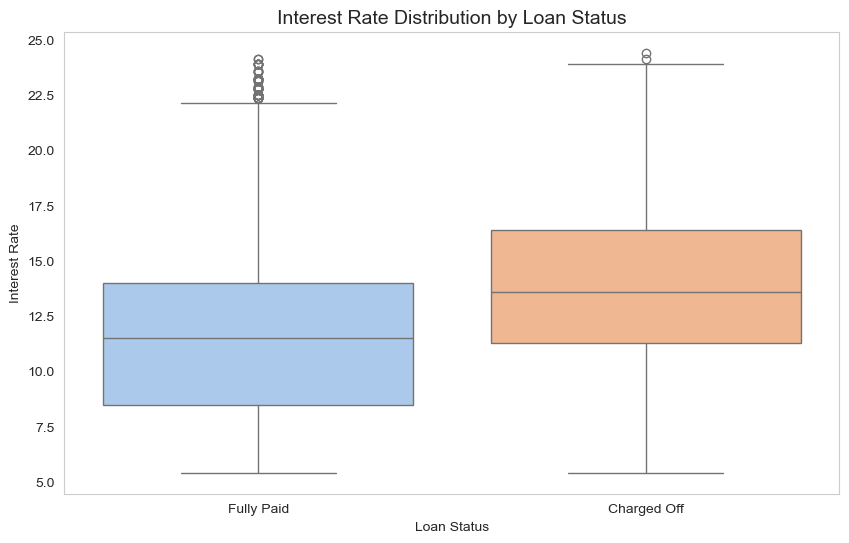

In [140]:
# Analyzing the relationship between Interest Rate and Loan Amount
plt.figure(figsize=(10, 6))
sns.boxplot(data=loan_data_cleaned, x='loan_status', y='int_rate', palette='pastel')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')
plt.title('Interest Rate Distribution by Loan Status', fontsize=14)
plt.show()

**Observations**: Median of interest rate is higher for Charged Off. It indicates that loans with higher interest rates are more likely to default.

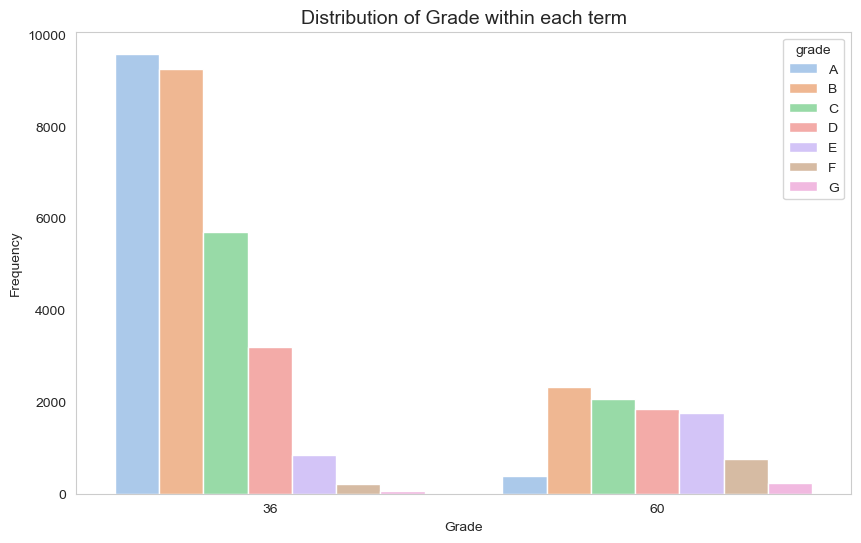

In [142]:
# Analyzing the distribution of Grade within each term
plt.figure(figsize=(10,6))
sns.countplot(data=loan_data_cleaned, x='term', hue='grade', palette='pastel')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.title('Distribution of Grade within each term', fontsize=14)
plt.show()

In [143]:
# Compute Cross Tabulation
term_grade_status_summary = pd.crosstab(loan_data_cleaned['term'], loan_data_cleaned['grade'], normalize='index') * 100
print(term_grade_status_summary)

grade          A          B          C          D          E         F  \
term                                                                     
36     33.255838  32.086471  19.750859  11.055207   2.949443  0.711336   
60      4.193342  24.903969  21.991037  19.643619  18.779343  7.991891   

grade         G  
term             
36     0.190846  
60     2.496799  


**Observations**: Higher-grade loans are more prevalent in shorter terms, while lower-grade loans are more common in longer terms, suggesting that lower-grade borrowers are often given longer terms.

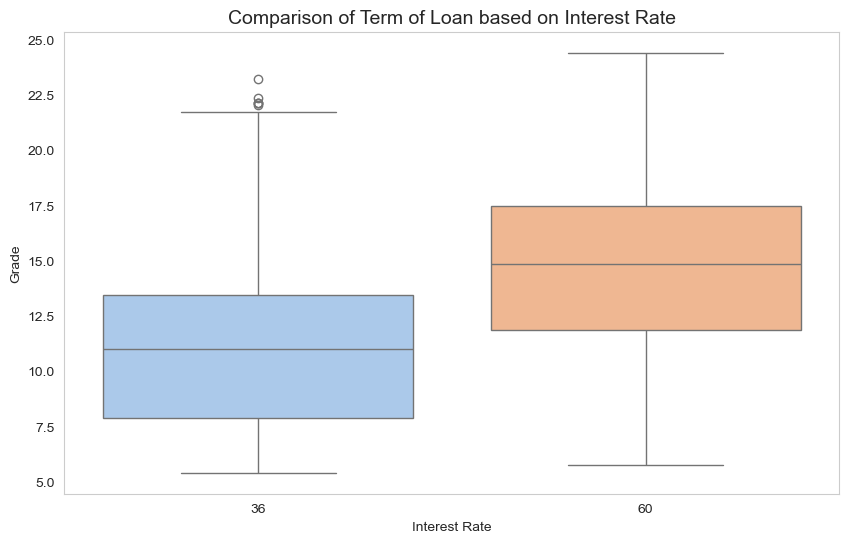

In [145]:
# Analyzing Term of Loan based on Interest Rate
plt.figure(figsize=(10,6))
sns.boxplot(data=loan_data_cleaned,x='term',y='int_rate', palette='pastel')
plt.xlabel('Interest Rate')
plt.ylabel('Grade')
plt.title('Comparison of Term of Loan based on Interest Rate',fontsize=14)
plt.show()

**Observations**: The average interest rate is higher for 60-month loans, and most long-term loans are issued at higher interest rates.

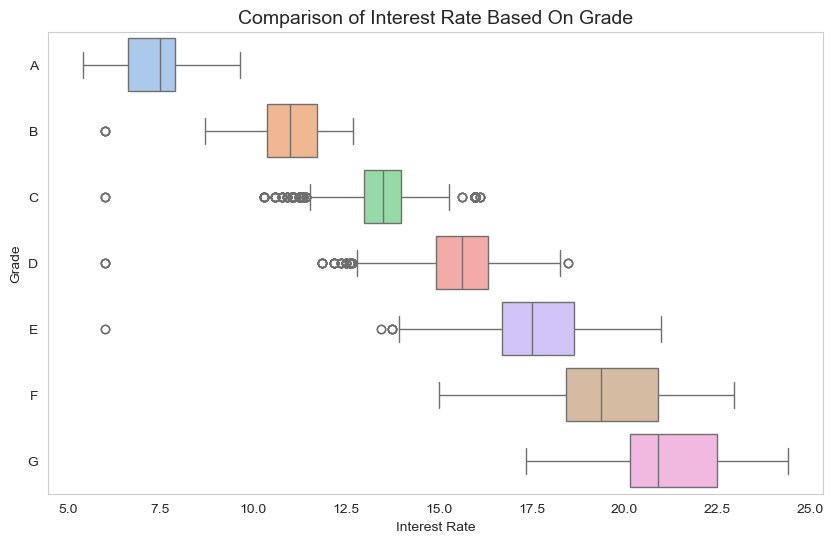

In [147]:
# Analyzing Interest Rate based on Grade
plt.figure(figsize=(10,6))
sns.boxplot(data=loan_data_cleaned,x='int_rate',y='grade', palette='pastel')
plt.xlabel('Interest Rate')
plt.ylabel('Grade')
plt.title('Comparison of Interest Rate Based On Grade',fontsize=14)
plt.show()

**Observations**: Higher-grade loans are considered riskier, which leads to increased interest rates.

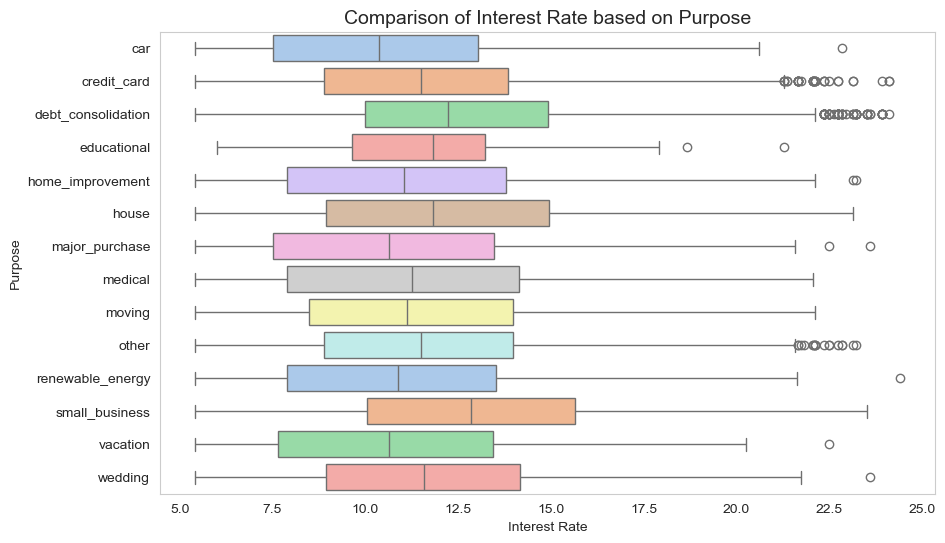

In [149]:
# Analyzing Interest Rate based on Purpose
plt.figure(figsize=(10,6))
sns.boxplot(data=loan_data_cleaned,x='int_rate',y='purpose', palette='pastel')
plt.xlabel('Interest Rate')
plt.ylabel('Purpose')
plt.title('Comparison of Interest Rate based on Purpose',fontsize=14)
plt.show()

**Observations**: The median and 75th percentile values of loans are highest for small business purposes, followed by debt consolidation and credit card loans.

### Observations:
#### Univariate Analysis:

- Loans that defaulted are fewer in number compared to those that were fully paid.
- The distribution appears similar for both Loan Amount and Funded Amount, with most amounts falling between 5,000 and 15,000.
- More loans were taken for 36 months compared to 60 months.
- The interest rates are most concentrated around 8%, with another peak between 10% and 15%.
- Most installment amounts are falling between 150 and 400.
- A significant portion of loans are graded 'A' and 'B', indicating that most loans are of high quality compared to the others.
- Similar to grade, a significant portion of loans are with lower sub-grade in 'A' and 'B'.
- The majority of borrowers have more than 10 years of work experience.
- The majority of borrowers are living in rented or mortgaged homes.
- The distribution of Annual Income is left-skewed, indicating that the majority of borrowers have relatively low annual incomes compared to the rest.
- More than 50% of borrowers are either verified by the lending company or have source verification.
- A significant percentage of loans are taken for debt consolidation, followed by credit card purposes.
- Most borrowers come from major urban areas such as California, New York, Florida, and Texas.
- Most borrowers have significantly high debt relative to their income, with the majority concentrated in the 10-20 DTI ratio range.
- Majority of the borrowers have no record of Public Recorded Bankruptcy.
- Majority of the loans are given in last 6 months of the year.
- The number of loans approved has been increasing at an exponential rate over time, indicating that the loan approval rate is rising steadily.
  
#### Segmented Univariate Analysis:

- Loan purpose like small business has higher default rates compared to other purposes, indicating that loans for this purpose is more likely to end in default.
- 25% of borrowers default on loans with a term of 60 months, compared to only 11% for loans with a term of 36 months. This indicates that a longer loan term is associated with a higher likelihood of default.
- As the grade decreases from A to G, the likelihood of a loan being charged off increases, while the likelihood of it being fully paid decreases.
- Employment length appears to have a relatively minor impact on loan repayment status, with most borrowers having a high rate of fully paid loans regardless of how long they have been employed.
- States like California, New York, Florida, and Texas have a high number of charged-offs, but they also have a higher total number of loans.
- Borrowers with a public record of bankruptcies have a higher likelihood of defaulting.

#### Bivariate Analysis:
- Median of interest rate is higher for Charged Off. It indicates that loans with higher interest rates are more likely to default.
- Higher-grade loans are more prevalent in shorter terms, while lower-grade loans are more common in longer terms, suggesting that lower-grade borrowers are often given longer terms.
- The average interest rate is higher for 60-month loans, and most long-term loans are issued at higher interest rates.
- Higher-grade loans are considered riskier, which leads to increased interest rates.
- The median and 75th percentile values of loans are highest for small business purposes, followed by debt consolidation and credit card loans.